<a href="https://colab.research.google.com/github/AVasundhara/Data-Analysis-Projects/blob/Sentimental-Analysis/Sentimental_Analysis_Vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy  # to access twitter API
import pandas as pd  # to perform basic data operations
import textblob # to process textual data

In [ ]:
# importing the keys from twitter api
ConsumerKey = "nY6WrnXzlRJuTMyxfn0eZ3BQR"
ConsumerSecret = "AWaoEfHCOZ0YIcsnCe8IZPA8wbtpQY12FSm4jz1SqwxtuSnjOs"
AccessToken = "1591657874433851393-xpyxxdQvf8VsYqP7J1wKI60oOrpH7e"
AccessTokenSecret = "KSCpPqGWvdVkHiN2myx7uUAtaZHYutfUY0lLowYiw3dPS"


In [ ]:
# establish the connection with twitter API
auth =tweepy.OAuthHandler(ConsumerKey, ConsumerSecret)
auth.set_access_token(AccessToken, AccessTokenSecret)
# wait_on_rate_limit=True,wait_on_rate_limit_notify=True <- helps to avoid 429 error
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
1# search for term and define number of tweets
SearchTerm = input("Enter Keyword/Tag to search about:")
NoOfTerms = int(input("Enter how may tweets to search:"))

Enter Keyword/Tag to search about:vaccine
Enter how may tweets to search:2000


In [ ]:
# get no of tweets and searched term together
# create the cursor object
tweets = tweepy.Cursor(api.search, q = SearchTerm, lang = 'en',since = '2019-01-01',tweet_mode = 'extended').items(NoOfTerms)

In [ ]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
from textblob import TextBlob
import nltk

In [ ]:
# store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]  

In [ ]:
# create a dataframe to store the tweets with a column name tweets
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
# show the 1st 5 rows of data
df.head(5)

,Tweets
0,"RT @saletan: On MTP, Fauci says uptake of the ..."
1,RT @laralogan: It’s not a vaccine when it’s ki...
2,RT @laralogan: It’s not a vaccine when it’s ki...
3,"RT @JamesMelville: For 2 years, media outlets ..."
4,@stassiaromo You have no idea. The Covid vacci...


In [ ]:
# create a function to clean the data
def cleanTwt (twt):
  twt = re.sub('#vaccine','vaccine',twt) # remove the '#' from #vaccine
  twt = re.sub('#Vaccine','Vaccine',twt) # remove the '#' from #Vaccine
  twt = re.sub('#[A-Za-z0-9]','',twt) # remove any string with #
  twt = re.sub('\\n','',twt) # remove the '\n' string
  twt = re.sub('https?:\/\/\s+','',twt) # remove any hyperlinks
  return twt


In [ ]:
# clean the data
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
# show the data set
df.tail(10)

,Tweets,Cleaned_Tweets
1990,"RT @JamesMelville: For 2 years, media outlets ...","RT @JamesMelville: For 2 years, media outlets ..."
1991,@_Janey_J Conspiracy crimes all over #vaccine ...,@_Janey_J Conspiracy crimes all over vaccine F...
1992,RT @GSK: Meningitis awareness and vaccine inno...,RT @GSK: Meningitis awareness and vaccine inno...
1993,"RT @BharatBiotech: iNCOVACC, World's first int...","RT @BharatBiotech: iNCOVACC, World's first int..."
1994,@lexiusaequitas @annemadiso @bhaney2 @amiwoods...,@lexiusaequitas @annemadiso @bhaney2 @amiwoods...
1995,RT @timesofindia: Bharat Biotech's intranasal ...,RT @timesofindia: Bharat Biotech's intranasal ...
1996,"@Veger70 @WhiteHouse In spite of, not because ...","@Veger70 @WhiteHouse In spite of, not because ..."
1997,RT @drsimonegold: According to a recent study ...,RT @drsimonegold: According to a recent study ...
1998,RT @drsimonegold: According to a recent study ...,RT @drsimonegold: According to a recent study ...
1999,@d_s_thakur @das_seed I am too old to remember...,@d_s_thakur @das_seed I am too old to remember...


In [ ]:
# create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
# create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

# create two new columns called 'subjectivity' and 'polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

# show data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,"RT @saletan: On MTP, Fauci says uptake of the ...","RT @saletan: On MTP, Fauci says uptake of the ...",0.427273,0.118182
1,RT @laralogan: It’s not a vaccine when it’s ki...,RT @laralogan: It’s not a vaccine when it’s ki...,0.475000,-0.325000
2,RT @laralogan: It’s not a vaccine when it’s ki...,RT @laralogan: It’s not a vaccine when it’s ki...,0.475000,-0.325000
3,"RT @JamesMelville: For 2 years, media outlets ...","RT @JamesMelville: For 2 years, media outlets ...",0.400000,0.100000
4,@stassiaromo You have no idea. The Covid vacci...,@stassiaromo You have no idea. The Covid vacci...,0.300000,0.068182


In [ ]:
# create a function to get the text sentimental 
def getSentimental(score):
  if score<0:
    return 'Negative'
  elif score== 0:
    return 'Neutral'
  else:
    return 'Positive'

# create a col for text setimental
df['Sentiment'] = df['Polarity'].apply(getSentimental)

# show data
df.head()


,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,"RT @saletan: On MTP, Fauci says uptake of the ...","RT @saletan: On MTP, Fauci says uptake of the ...",0.427273,0.118182,Positive
1,RT @laralogan: It’s not a vaccine when it’s ki...,RT @laralogan: It’s not a vaccine when it’s ki...,0.475000,-0.325000,Negative
2,RT @laralogan: It’s not a vaccine when it’s ki...,RT @laralogan: It’s not a vaccine when it’s ki...,0.475000,-0.325000,Negative
3,"RT @JamesMelville: For 2 years, media outlets ...","RT @JamesMelville: For 2 years, media outlets ...",0.400000,0.100000,Positive
4,@stassiaromo You have no idea. The Covid vacci...,@stassiaromo You have no idea. The Covid vacci...,0.300000,0.068182,Positive


In [ ]:
df.shape[0]  # no of rows

2000

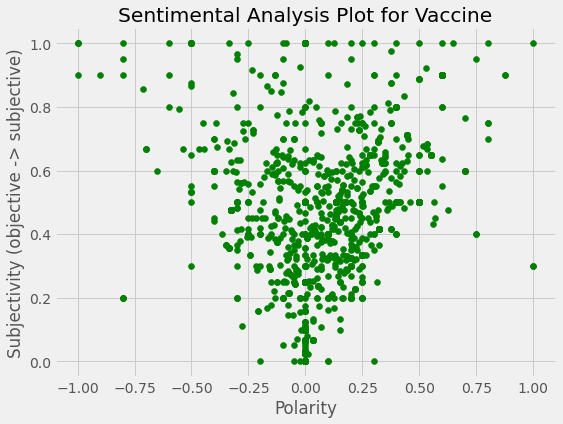

In [ ]:
# create a scatter plot to show the subjectivity and polarity 
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'green')
plt.title('Sentimental Analysis Plot for Vaccine')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

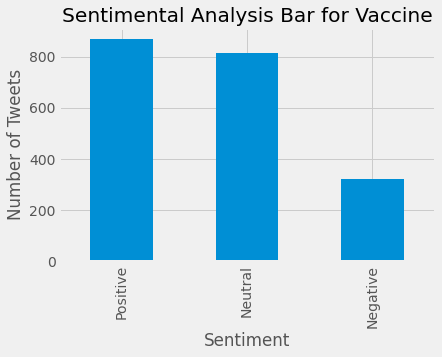

In [ ]:
# create a bar chart to show the count of positive, negative and neutral sentiments
df['Sentiment'].value_counts().plot(kind= 'bar')
plt.title('Sentimental Analysis Bar for Vaccine')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
df['Sentiment'].value_counts()

Positive    868
Neutral     812
Negative    320
Name: Sentiment, dtype: int64